In [1]:
import pandas as pd
import scipy.stats as stats
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#read file from location  
file_path = "C:\\Users\\Hasan\\Desktop\\data science folder\\MachineLearningRating_v3.txt"
# Read the file (adjust delimiter as necessary)
df = pd.read_csv(file_path, delimiter='|')

 #Set display options
pd.set_option('display.max_rows', 1000)  # Limit the number of rows
pd.set_option('display.max_columns', None)  # Show all columns

# Print the DataFrame
print(df)

C:\Users\Hasan\AppData\Local\Temp\ipykernel_11996\3464166461.py:4: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, delimiter='|')


         UnderwrittenCoverID  PolicyID     TransactionMonth  IsVATRegistered  \
0                     145249     12827  2015-03-01 00:00:00             True   
1                     145249     12827  2015-05-01 00:00:00             True   
2                     145249     12827  2015-07-01 00:00:00             True   
3                     145255     12827  2015-05-01 00:00:00             True   
4                     145255     12827  2015-07-01 00:00:00             True   
...                      ...       ...                  ...              ...   
1000093                31520       389  2015-04-01 00:00:00            False   
1000094                31520       389  2015-06-01 00:00:00            False   
1000095                31520       389  2015-08-01 00:00:00            False   
1000096                31519       389  2014-07-01 00:00:00            False   
1000097                31519       389  2015-02-01 00:00:00            False   

        Citizenship          LegalType 

In [3]:
if df.isnull().values.any():
    print("The dataset contains missing values.")
else:
    print("No missing values in the dataset.")

The dataset contains missing values.


In [4]:
# Calculate missing values
missing_count = df.isnull().sum()  # Count of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100  # Percentage of missing values

# Combine both into a single DataFrame
missing_summary = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Percentage': missing_percentage
})

# Display columns with missing data only
missing_summary = missing_summary[missing_summary['Missing Count'] > 0]

print("Missing Values Summary:")
print(missing_summary)


Missing Values Summary:
                         Missing Count  Missing Percentage
Bank                            145961           14.594670
AccountType                      40232            4.022806
MaritalStatus                     8259            0.825819
Gender                            9536            0.953507
mmcode                             552            0.055195
VehicleType                        552            0.055195
make                               552            0.055195
Model                              552            0.055195
Cylinders                          552            0.055195
cubiccapacity                      552            0.055195
kilowatts                          552            0.055195
bodytype                           552            0.055195
NumberOfDoors                      552            0.055195
VehicleIntroDate                   552            0.055195
CustomValueEstimate             779642           77.956560
CapitalOutstanding              

In [5]:
# Fill missing values for numeric columns with mean
for column in df.select_dtypes(include=['float64', 'int64']):
    df[column] = df[column].fillna(df[column].mean())

# Fill missing values for categorical columns with mode
for column in df.select_dtypes(include=['object']):
    df[column] = df[column].fillna(df[column].mode()[0])

# Verify after filling
print(df.isnull().sum())

UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                              0
AccountType                       0
MaritalStatus                     0
Gender                            0
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                            0
VehicleType                       0
RegistrationYear                  0
make                              0
Model                             0
Cylinders                         0
cubiccapacity                     0
kilowatts                         0
bodytype                          0
NumberOfDoors               

In [6]:
# Select numerical features
numerical_columns = ['TotalPremium', 'TotalClaims']  # Add other numerical features as needed
numerical_data = df[numerical_columns]

# Ensure no missing values in numerical columns
numerical_data = numerical_data.fillna(0)

# Descriptive statistics for numerical features
print("\nDescriptive Statistics:")
print(numerical_data.describe())

# Variability Measures
for col in numerical_columns:
    print(f"\nVariability Measures for {col}:")
    variance = numerical_data[col].var()
    std_dev = numerical_data[col].std()
    data_range = numerical_data[col].max() - numerical_data[col].min()
    print(f"Variance: {variance:.2f}")
    print(f"Standard Deviation: {std_dev:.2f}")
    print(f"Range: {data_range:.2f}")



Descriptive Statistics:
       TotalPremium   TotalClaims
count  1.000098e+06  1.000098e+06
mean   6.190550e+01  6.486119e+01
std    2.302845e+02  2.384075e+03
min   -7.825768e+02 -1.200241e+04
25%    0.000000e+00  0.000000e+00
50%    2.178333e+00  0.000000e+00
75%    2.192982e+01  0.000000e+00
max    6.528260e+04  3.930921e+05

Variability Measures for TotalPremium:
Variance: 53030.96
Standard Deviation: 230.28
Range: 66065.18

Variability Measures for TotalClaims:
Variance: 5683812.15
Standard Deviation: 2384.07
Range: 405094.52


In [7]:
# Check for categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns
print("\nCategorical Variables:")
print(categorical_columns)

# Check for date columns (if any column contains date values)
date_columns = []
for col in df.columns:
    if pd.api.types.is_datetime64_any_dtype(df[col]):
        date_columns.append(col)
    elif pd.api.types.is_object_dtype(df[col]):
        try:
            pd.to_datetime(df[col])
            date_columns.append(col)
        except ValueError:
            pass
print("\nDate Columns:")
print(date_columns)

# Check sample data to confirm formatting
print("\nSample Data:")
# Check unique values in categorical variables
print("\nUnique Values in Categorical Variables:")
for col in categorical_columns:
    print(f"{col}: {df[col].nunique()} unique values")



Categorical Variables:
Index(['TransactionMonth', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'VehicleType', 'make',
       'Model', 'bodytype', 'VehicleIntroDate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'TermFrequency',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType'],
      dtype='object')


C:\Users\Hasan\AppData\Local\Temp\ipykernel_11996\3471234729.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df[col])
C:\Users\Hasan\AppData\Local\Temp\ipykernel_11996\3471234729.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df[col])
C:\Users\Hasan\AppData\Local\Temp\ipykernel_11996\3471234729.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df[col])
C:\Users\Hasan\AppData\Local\Temp\ipykernel_11996\3471234729.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to 


Date Columns:
['TransactionMonth', 'VehicleIntroDate']

Sample Data:

Unique Values in Categorical Variables:
TransactionMonth: 23 unique values
Citizenship: 4 unique values
LegalType: 6 unique values
Title: 5 unique values
Language: 1 unique values
Bank: 11 unique values
AccountType: 3 unique values
MaritalStatus: 3 unique values
Gender: 3 unique values
Country: 1 unique values
Province: 9 unique values
MainCrestaZone: 16 unique values
SubCrestaZone: 45 unique values
ItemType: 1 unique values
VehicleType: 5 unique values
make: 46 unique values
Model: 411 unique values
bodytype: 13 unique values
VehicleIntroDate: 174 unique values
AlarmImmobiliser: 2 unique values
TrackingDevice: 2 unique values
CapitalOutstanding: 1011 unique values
NewVehicle: 2 unique values
WrittenOff: 2 unique values
Rebuilt: 2 unique values
Converted: 2 unique values
CrossBorder: 1 unique values
TermFrequency: 2 unique values
ExcessSelected: 13 unique values
CoverCategory: 28 unique values
CoverType: 22 unique v

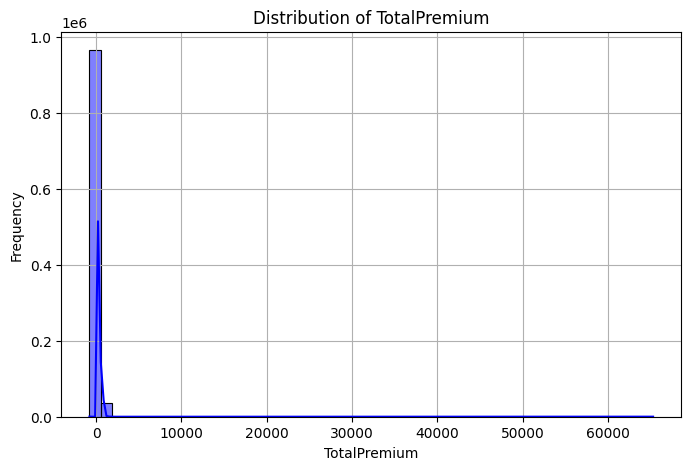

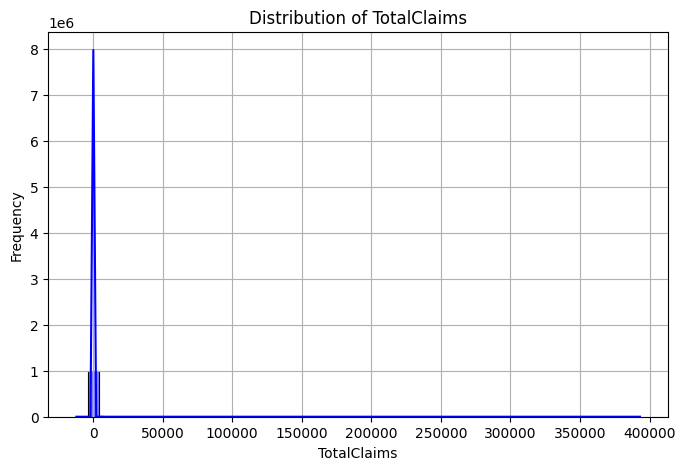

In [8]:
#Univariate Analysis to visualize the distributions of numerical and categorical variables
# Select numerical and categorical columns
# List of numerical columns
numerical_columns = ['TotalPremium', 'TotalClaims']

# Plot histograms for numerical columns
for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=column, bins=50, kde=True, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show() 

C:\Users\Hasan\AppData\Local\Temp\ipykernel_11996\2447544046.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='coolwarm', order=df[column].value_counts().index)


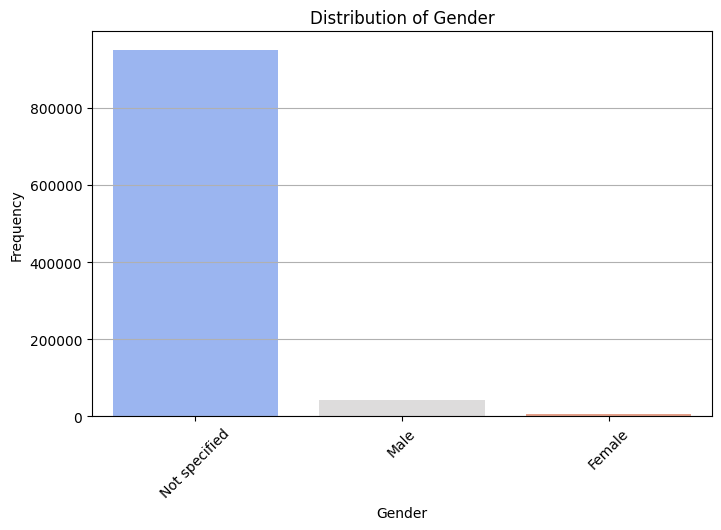

C:\Users\Hasan\AppData\Local\Temp\ipykernel_11996\2447544046.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='coolwarm', order=df[column].value_counts().index)


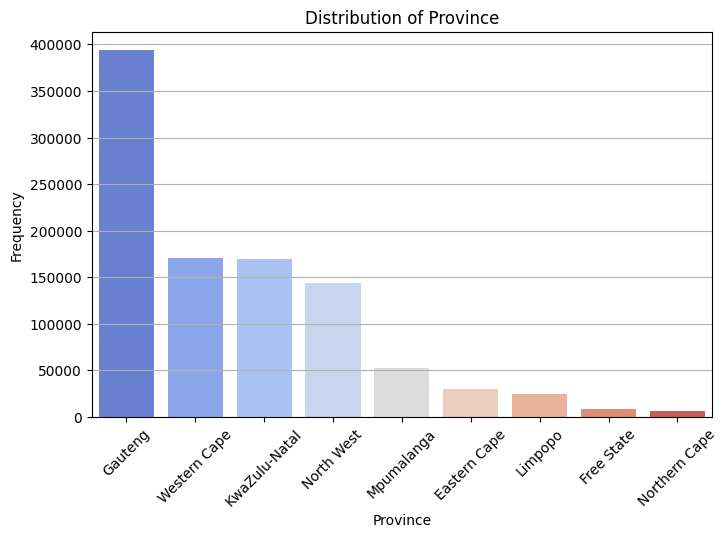

C:\Users\Hasan\AppData\Local\Temp\ipykernel_11996\2447544046.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='coolwarm', order=df[column].value_counts().index)


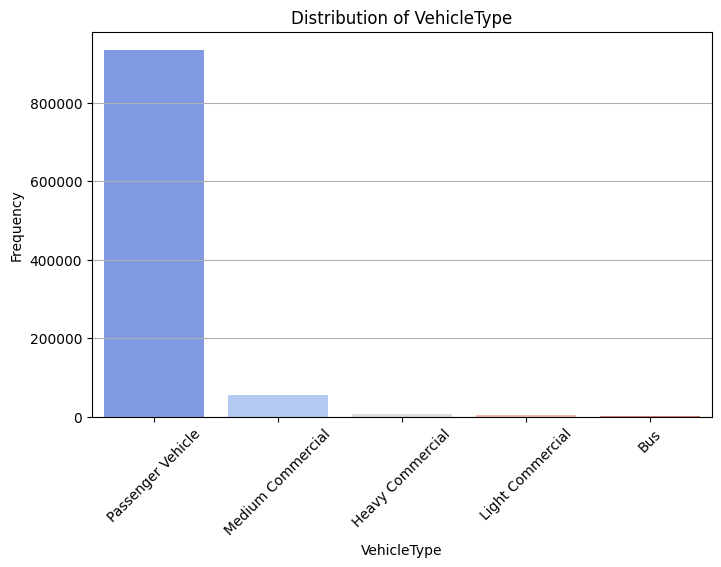

C:\Users\Hasan\AppData\Local\Temp\ipykernel_11996\2447544046.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='coolwarm', order=df[column].value_counts().index)


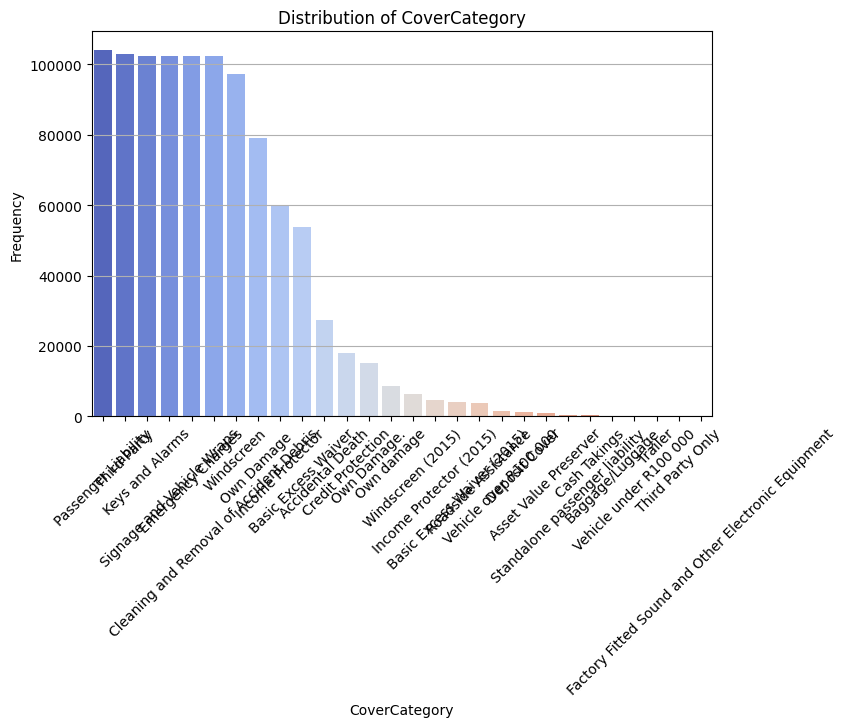

In [9]:
# List of categorical columns
categorical_columns = ['Gender', 'Province', 'VehicleType', 'CoverCategory']

# Plot bar charts for categorical columns
for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=column, palette='coolwarm', order=df[column].value_counts().index)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()


C:\Users\Hasan\AppData\Local\Temp\ipykernel_11996\909740584.py:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


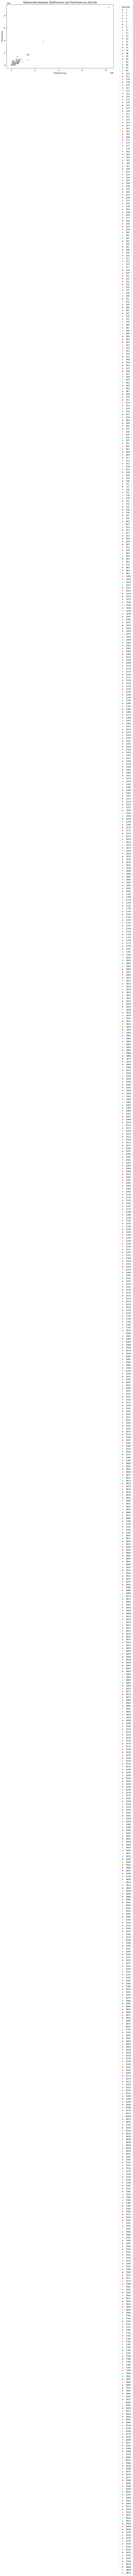

In [10]:

# Handle missing values for TotalPremium and TotalClaims
df['TotalPremium'] = df['TotalPremium'].fillna(0)
df['TotalClaims'] = df['TotalClaims'].fillna(0)

# Ensure ZipCode is treated as categorical
df['PostalCode'] = df['PostalCode'].fillna('Unknown')

# Group data by ZipCode and calculate monthly changes
df_grouped = df.groupby('PostalCode')[['TotalPremium', 'TotalClaims']].sum().reset_index()

# Scatter plot: TotalPremium vs TotalClaims by ZipCode
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_grouped, x='TotalPremium', y='TotalClaims', hue='PostalCode', palette='tab10')
plt.title("Relationship Between TotalPremium and TotalClaims by ZipCode")
plt.xlabel("TotalPremium")
plt.ylabel("TotalClaims")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="ZipCode")
plt.tight_layout()
plt.show()


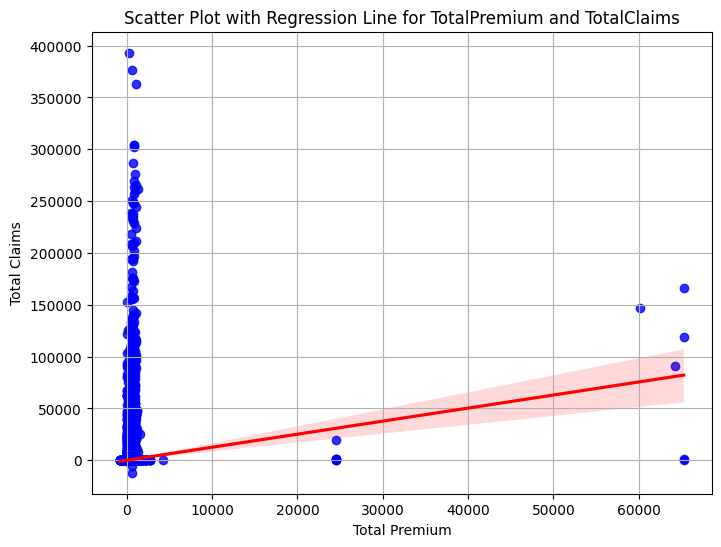

Correlation between TotalPremium and TotalClaims: 0.12


In [11]:
# Calculate correlation matrix
# Scatter plot with regression line for correlation
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='TotalPremium', y='TotalClaims', scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title("Scatter Plot with Regression Line for TotalPremium and TotalClaims")
plt.xlabel("Total Premium")
plt.ylabel("Total Claims")
plt.grid(True)
plt.show()
correlation = df['TotalPremium'].corr(df['TotalClaims'])
print(f"Correlation between TotalPremium and TotalClaims: {correlation:.2f}")

In [12]:
# Example: Assuming 'CalculatedPremiumPerTerm' represents risk and 'Province' is the column with provinces
provinces = df['Province'].unique()

# Perform ANOVA (assumes 'CalculatedPremiumPerTerm' represents risk)
risk_by_province = [df[df['Province'] == province]['CalculatedPremiumPerTerm'] for province in provinces]
f_stat, p_value = stats.f_oneway(*risk_by_province)

print(f'ANOVA Results - F-statistic: {f_stat}, p-value: {p_value}')

# Accept or reject the null hypothesis
if p_value < 0.05:
    print("Reject the null hypothesis: There are significant risk differences across provinces.")
else:
    print("Accept the null hypothesis: There are no significant risk differences across provinces.")

ANOVA Results - F-statistic: 116.11960841621531, p-value: 3.9587382254717424e-195
Reject the null hypothesis: There are significant risk differences across provinces.


In [13]:
# Example: Assuming 'CalculatedPremiumPerTerm' represents risk and 'PostalCode' represents zip codes
zipcodes = df['PostalCode'].unique()

# Perform ANOVA for postal codes (assuming more than two zip codes are available)
risk_by_zipcode = [df[df['PostalCode'] == zipcode]['CalculatedPremiumPerTerm'] for zipcode in zipcodes]
f_stat, p_value = stats.f_oneway(*risk_by_zipcode)

print(f'ANOVA Results - F-statistic: {f_stat}, p-value: {p_value}')

# Accept or reject the null hypothesis
if p_value < 0.05:
    print("Reject the null hypothesis: There are significant risk differences between zip codes.")
else:
    print("Accept the null hypothesis: There are no significant risk differences between zip codes.")


ANOVA Results - F-statistic: 5.715375005231982, p-value: 0.0
Reject the null hypothesis: There are significant risk differences between zip codes.


In [14]:
# Example: Assuming 'TotalPremium' represents the margin/profit and 'PostalCode' represents zip codes
zipcodes = df['PostalCode'].unique()

# Perform ANOVA for postal codes
profit_by_zipcode = [df[df['PostalCode'] == zipcode]['TotalPremium'] for zipcode in zipcodes]
f_stat, p_value = stats.f_oneway(*profit_by_zipcode)

print(f'ANOVA Results - F-statistic: {f_stat}, p-value: {p_value}')

# Accept or reject the null hypothesis
if p_value < 0.05:
    print("Reject the null hypothesis: There are significant margin differences between zip codes.")
else:
    print("Accept the null hypothesis: There are no significant margin differences between zip codes.")

ANOVA Results - F-statistic: 10.81111575835253, p-value: 0.0
Reject the null hypothesis: There are significant margin differences between zip codes.


In [15]:
# Example: Assuming 'CalculatedPremiumPerTerm' represents risk and 'Gender' represents gender
women_risk = df[df['Gender'] == 'Female']['CalculatedPremiumPerTerm']
men_risk = df[df['Gender'] == 'Male']['CalculatedPremiumPerTerm']

# Perform t-test comparing women vs. men
t_stat, p_value = stats.ttest_ind(women_risk, men_risk)

print(f'T-test Results - t-statistic: {t_stat}, p-value: {p_value}')

# Accept or reject the null hypothesis
if p_value < 0.05:
    print("Reject the null hypothesis: There are significant risk differences between women and men.")
else:
    print("Accept the null hypothesis: There are no significant risk differences between women and men.")

T-test Results - t-statistic: -1.7063669128128982, p-value: 0.08794605068006252
Accept the null hypothesis: There are no significant risk differences between women and men.


In [16]:
# Relevant features
features = ['Province', 'PostalCode', 'VehicleType', 'make', 'Model', 'Cylinders', 'cubiccapacity', 'SumInsured', 'CalculatedPremiumPerTerm']
target = 'TotalClaims'

# Remove rows with missing values in the selected columns
df_clean = df.dropna(subset=features + [target])

# Group by PostalCode and fit a model for each
zipcodes = df_clean['PostalCode'].unique()
zipcode_models = {}

for zipcode in zipcodes:
    zipcode_data = df_clean[df_clean['PostalCode'] == zipcode]
    
    # Check if the number of samples is sufficient for train-test split
    if len(zipcode_data) < 2:
        print(f"Skipping zipcode {zipcode} due to insufficient data.")
        continue  # Skip this zipcode
    
    # Define features (X) and target (y)
    X = zipcode_data[features]
    y = zipcode_data[target]
    
    # One-hot encode categorical columns (like VehicleType, make, etc.)
    X = pd.get_dummies(X, drop_first=True)
    
    # Train-Test Split for each zipcode's dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create and train the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions and evaluate the model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    
    # Store the model and its error
    zipcode_models[zipcode] = {'model': model, 'mse': mse}

    print(f"Zipcode {zipcode} - MSE: {mse}")

   

Zipcode 1459 - MSE: 0.0
Zipcode 1513 - MSE: 0.0
Zipcode 1619 - MSE: 69093.6152083547
Zipcode 1625 - MSE: 241.77169253467977
Zipcode 1629 - MSE: 0.0
Zipcode 1852 - MSE: 227536.05968801433
Zipcode 1982 - MSE: 1352.7878462801978
Zipcode 2007 - MSE: 0.0
Zipcode 2066 - MSE: 919328.5622060761
Zipcode 4093 - MSE: 1546783.78277442
Zipcode 2000 - MSE: 3276150.1198398136
Zipcode 1577 - MSE: 0.0
Zipcode 1610 - MSE: 1194904.5821271823
Zipcode 2410 - MSE: 53453.74706601319
Zipcode 6200 - MSE: 4.323638515467987
Zipcode 122 - MSE: 2868113.787528239
Zipcode 1520 - MSE: 27.686520177297943
Zipcode 1709 - MSE: 377412.9494717235
Zipcode 1739 - MSE: 4267687.461210572
Zipcode 4000 - MSE: 11186164.011626525
Zipcode 4066 - MSE: 130338.81561103024
Zipcode 4091 - MSE: 1110975.938056006
Zipcode 4342 - MSE: 0.0
Zipcode 4359 - MSE: 106359.52732168583
Zipcode 7784 - MSE: 10045225.71252445
Zipcode 970 - MSE: 0.0
Zipcode 6213 - MSE: 216496.13715359257
Zipcode 6390 - MSE: 0.0
Zipcode 1868 - MSE: 3942344.3313682075
Zip

In [18]:
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
# Adjusted Filtering for 'CoverType' based on available categories
group_a = df[df['CoverType'] == 'Third Party Only']  # Group A: Third Party Only
group_b = df[df['CoverType'] == 'Own Damage']  # Group B: Own Damage

# Validate group similarity (Numerical Columns)
numerical_columns = ['TotalPremium', 'TotalClaims', 'SumInsured']
for col in numerical_columns:
    stat, p_value = ttest_ind(group_a[col].dropna(), group_b[col].dropna())
    print(f"T-test for {col}: p-value = {p_value:.4f}")
    if p_value < 0.05:
        print(f"WARNING: {col} is significantly different between groups (p < 0.05).")
    else:
        print(f"{col} is not significantly different between groups (p >= 0.05).")

# Validate group similarity (Categorical Columns)
categorical_columns = ['Gender', 'Province', 'VehicleType']
for col in categorical_columns:
    contingency_table = pd.crosstab(df[col], df['CoverType'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-squared test for {col}: p-value = {p_value:.4f}")
    if p_value < 0.05:
        print(f"WARNING: {col} is significantly different between groups (p < 0.05).")
    else:
        print(f"{col} is not significantly different between groups (p >= 0.05).")




T-test for TotalPremium: p-value = 0.0011
T-test for TotalClaims: p-value = 0.5324
TotalClaims is not significantly different between groups (p >= 0.05).


c:\Users\Hasan\anaconda3\lib\site-packages\scipy\stats\_axis_nan_policy.py:573: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


T-test for SumInsured: p-value = 0.0000
Chi-squared test for Gender: p-value = 0.0000
Chi-squared test for Province: p-value = 0.0000
Chi-squared test for VehicleType: p-value = 0.0000


In [19]:
import scipy.stats as stats
#Chi-Squared Test (for Categorical Variables)
# Create a contingency table for 'Gender' and 'IsVATRegistered'
contingency_table = pd.crosstab(df['Gender'], df['IsVATRegistered'])

# Perform the chi-squared test
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

# Output results
print(f"Chi-Squared Statistic: {chi2_stat}")
print(f"P-Value: {p_val}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies:\n{expected}")

# Interpretation
if p_val < 0.05:
    print("Reject the null hypothesis: There is a significant relationship between Gender and VAT registration status.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between Gender and VAT registration status.")


Chi-Squared Statistic: 263.28272357121875
P-Value: 6.743463113631323e-58
Degrees of Freedom: 2
Expected Frequencies:
[[6.72107296e+03 3.39270402e+01]
 [4.26019513e+04 2.15048716e+02]
 [9.45751976e+05 4.77402424e+03]]
Reject the null hypothesis: There is a significant relationship between Gender and VAT registration status.


In [20]:
#T-Test (for Numerical Variables)
# Split the data by 'Gender' and extract 'TotalPremium' for each group
group_male = df[df['Gender'] == 'Male']['TotalPremium'].dropna()
group_female = df[df['Gender'] == 'Female']['TotalPremium'].dropna()

# Perform an independent t-test
t_stat, p_value = stats.ttest_ind(group_male, group_female)

# Output results
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in TotalPremium between males and females.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in TotalPremium between males and females.")


T-Statistic: -5.118420932688848
P-Value: 3.0925282750010697e-07
Reject the null hypothesis: There is a significant difference in TotalPremium between males and females.


In [21]:
#Z-Test (for Large Samples or Known Population Variance)
# Example: Testing if the mean TotalClaims is significantly different from a population mean of 50
population_mean = 50
sample_mean = df['TotalClaims'].mean()
population_std = df['TotalClaims'].std()  # Assuming you know the population standard deviation
sample_size = len(df['TotalClaims'])

# Calculate the standard error
standard_error = population_std / (sample_size ** 0.5)

# Calculate the z-statistic
z_stat = (sample_mean - population_mean) / standard_error

# Calculate the p-value for two-tailed test
p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))

# Output results
print(f"Z-Statistic: {z_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: The mean TotalClaims is significantly different from the population mean.")
else:
    print("Fail to reject the null hypothesis: The mean TotalClaims is not significantly different from the population mean.")


Z-Statistic: 6.233830671845967
P-Value: 4.551650167883281e-10
Reject the null hypothesis: The mean TotalClaims is significantly different from the population mean.


In [22]:
#Statistical Modeling
# a. Impute missing values
# Impute 'NumberOfVehiclesInFleet' with the mean since it's numeric
df['NumberOfVehiclesInFleet'].fillna(df['NumberOfVehiclesInFleet'].mean(), inplace=True)

# Impute other numerical columns with mean or median if required (example: 'TotalPremium' and 'TotalClaims')
df['TotalPremium'].fillna(df['TotalPremium'].mean(), inplace=True)
df['TotalClaims'].fillna(df['TotalClaims'].mean(), inplace=True)

# For categorical features like 'Country', 'Gender', 'VehicleType', impute with the most frequent value (mode)
df['Country'].fillna(df['Country'].mode()[0], inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['VehicleType'].fillna(df['VehicleType'].mode()[0], inplace=True)

# 1.1. Create Missing Flag Features (Optional)
df['NumberOfVehiclesInFleet_missing'] = df['NumberOfVehiclesInFleet'].isnull().astype(int)
df['TotalPremium_missing'] = df['TotalPremium'].isnull().astype(int)
df['TotalClaims_missing'] = df['TotalClaims'].isnull().astype(int)

# 2. Feature Engineering

## a. Aggregated Features
# Premium to Claims Ratio (can help understand profitability/risk)
df['Premium_to_Claims_Ratio'] = df['TotalPremium'] / (df['TotalClaims'] + 1)  # Adding 1 to avoid division by zero

# Premium per Claim
df['Premium_per_Claim'] = df['TotalPremium'] / (df['TotalClaims'] + 1)

## b. Time-based Features
# Assuming 'TransactionMonth' is a date column, we can extract year and month from it
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], errors='coerce')  # Convert to datetime
df['Year'] = df['TransactionMonth'].dt.year
df['Month'] = df['TransactionMonth'].dt.month

## c. Interaction Features
# Vehicle Type and Sum Insured (could indicate a relationship between vehicle type and insured value)
df['VehicleType_SumInsured'] = df['VehicleType'] + '_' + df['SumInsured'].astype(str)

# Interaction between 'Gender' and 'VehicleType' (this might show a relationship between gender and vehicle type)
df['Gender_VehicleType'] = df['Gender'] + '_' + df['VehicleType']

## d. Statistical Features
# Cumulative Claims (sum of claims over time)
df['Cumulative_Claims'] = df.groupby('PolicyID')['TotalClaims'].cumsum()

# Rolling average for claims over 3 periods (you can change window size as needed)
df['Rolling_Avg_Claims'] = df['TotalClaims'].rolling(window=3).mean()

## e. Encoding Categorical Variables
# One-Hot Encoding for categorical variables like 'Gender', 'Country', 'VehicleType'
df = pd.get_dummies(df, columns=['Gender', 'Country', 'VehicleType'], drop_first=True)

# 3. Show the Final DataFrame after preprocessing
print("\nProcessed DataFrame:\n")
print(df.head())

# Optionally, you can save the cleaned and feature-engineered DataFrame to a new CSV file
df.to_csv('cleaned_dataset.csv', index=False)


C:\Users\Hasan\AppData\Local\Temp\ipykernel_11996\2956885257.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['NumberOfVehiclesInFleet'].fillna(df['NumberOfVehiclesInFleet'].mean(), inplace=True)
C:\Users\Hasan\AppData\Local\Temp\ipykernel_11996\2956885257.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v


Processed DataFrame:

   UnderwrittenCoverID  PolicyID TransactionMonth  IsVATRegistered  \
0               145249     12827       2015-03-01             True   
1               145249     12827       2015-05-01             True   
2               145249     12827       2015-07-01             True   
3               145255     12827       2015-05-01             True   
4               145255     12827       2015-07-01             True   

  Citizenship          LegalType Title Language                 Bank  \
0              Close Corporation    Mr  English  First National Bank   
1              Close Corporation    Mr  English  First National Bank   
2              Close Corporation    Mr  English  First National Bank   
3              Close Corporation    Mr  English  First National Bank   
4              Close Corporation    Mr  English  First National Bank   

       AccountType  MaritalStatus Province  PostalCode MainCrestaZone  \
0  Current account  Not specified  Gauteng        

In [23]:
from sklearn.preprocessing import LabelEncoder

# Categorical columns that are not one-hot encoded yet (including 'LegalType' and 'CoverType')
# These columns can be Label Encoded or One-Hot Encoded if needed
categorical_columns = ['LegalType', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 
                       'StatutoryClass', 'StatutoryRiskType', 'Citizenship', 'Title', 'Language', 
                       'Bank', 'AccountType', 'MaritalStatus', 'Province', 'PostalCode', 
                       'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode', 'make', 'Model', 
                       'Cylinders', 'cubiccapacity', 'kilowatts', 'bodytype']

# 1. Label Encoding: Apply Label Encoding for ordinal or non-encoded categorical variables
label_encoder = LabelEncoder()

# Loop through each categorical column and apply label encoding
for col in categorical_columns:
    if col in df.columns:
        df[col + '_Label'] = label_encoder.fit_transform(df[col].astype(str))

print("\nData with Label Encoding applied to categorical columns:")
print(df[['LegalType', 'CoverType', 'LegalType_Label', 'CoverType_Label']].head())

# 2. One-Hot Encoding: Apply One-Hot Encoding to columns like 'VehicleType' that may already be partially encoded
# If 'VehicleType' is in the dataset, we will apply one-hot encoding to it
if 'VehicleType' in df.columns:
    df = pd.get_dummies(df, columns=['VehicleType'], drop_first=True)

# 3. Handle Missing Values: Impute missing data if necessary (e.g., replace missing numeric values with the mean)
df['NumberOfVehiclesInFleet'].fillna(df['NumberOfVehiclesInFleet'].mean(), inplace=True)

# Optionally, remove columns with 'missing' suffix if they are no longer needed
df.drop(columns=['NumberOfVehiclesInFleet_missing', 'TotalPremium_missing', 'TotalClaims_missing'], inplace=True)

# 4. Save the processed DataFrame to a new CSV file
df.to_csv('encoded_processed_dataset.csv', index=False)

# Display the first few rows of the processed data
print("\nProcessed dataset with encoding and missing values handled:")
print(df.head())



Data with Label Encoding applied to categorical columns:
           LegalType   CoverType  LegalType_Label  CoverType_Label
0  Close Corporation  Windscreen                0               21
1  Close Corporation  Windscreen                0               21
2  Close Corporation  Windscreen                0               21
3  Close Corporation  Own Damage                0               13
4  Close Corporation  Own Damage                0               13


C:\Users\Hasan\AppData\Local\Temp\ipykernel_11996\2550979864.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['NumberOfVehiclesInFleet'].fillna(df['NumberOfVehiclesInFleet'].mean(), inplace=True)



Processed dataset with encoding and missing values handled:
   UnderwrittenCoverID  PolicyID TransactionMonth  IsVATRegistered  \
0               145249     12827       2015-03-01             True   
1               145249     12827       2015-05-01             True   
2               145249     12827       2015-07-01             True   
3               145255     12827       2015-05-01             True   
4               145255     12827       2015-07-01             True   

  Citizenship          LegalType Title Language                 Bank  \
0              Close Corporation    Mr  English  First National Bank   
1              Close Corporation    Mr  English  First National Bank   
2              Close Corporation    Mr  English  First National Bank   
3              Close Corporation    Mr  English  First National Bank   
4              Close Corporation    Mr  English  First National Bank   

       AccountType  MaritalStatus Province  PostalCode MainCrestaZone  \
0  Current a

In [24]:

from sklearn.model_selection import train_test_split

# Separate the target variables (TotalPremium and TotalClaims) from the features
# Assuming 'TotalPremium' and 'TotalClaims' are the target variables
X = df.drop(columns=['TotalPremium', 'TotalClaims'])  # Features
y = df[['TotalPremium', 'TotalClaims']]  # Target variables

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the resulting data
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")


Training features shape: (800078, 87)
Testing features shape: (200020, 87)
Training target shape: (800078, 2)
Testing target shape: (200020, 2)


In [25]:
# Convert all columns to numeric, coercing errors to NaN
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Handle missing values after conversion
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_test.median())


In [26]:
# Ensure the target columns are numeric
y_train['TotalPremium'] = pd.to_numeric(y_train['TotalPremium'], errors='coerce')
y_train['TotalClaims'] = pd.to_numeric(y_train['TotalClaims'], errors='coerce')
y_test['TotalPremium'] = pd.to_numeric(y_test['TotalPremium'], errors='coerce')
y_test['TotalClaims'] = pd.to_numeric(y_test['TotalClaims'], errors='coerce')

# Handle missing values in the target columns
y_train = y_train.dropna()
y_test = y_test.dropna()


In [27]:
# Separate numeric and categorical columns
numeric_columns = X_train.select_dtypes(include=['number']).columns
categorical_columns = X_train.select_dtypes(exclude=['number']).columns

# Impute missing values in numeric columns using the median
X_train[numeric_columns] = X_train[numeric_columns].fillna(X_train[numeric_columns].median())
X_test[numeric_columns] = X_test[numeric_columns].fillna(X_test[numeric_columns].median())

# Impute missing values in categorical columns using the mode (most frequent value)
for col in categorical_columns:
    X_train[col] = X_train[col].fillna(X_train[col].mode()[0])
    X_test[col] = X_test[col].fillna(X_test[col].mode()[0])

# Ensure that the target variables (y_train and y_test) don't contain missing values
y_train = y_train.dropna()
y_test = y_test.dropna()

# Now, your X_train, X_test, y_train, and y_test should have no missing values


In [28]:
# Drop columns that are entirely NaN in X_train
X_train = X_train.dropna(axis=1, how='all')

# Apply the same transformation to X_test
X_test = X_test[X_train.columns]


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Fit the model
model_premium = LinearRegression()
model_premium.fit(X_train, y_train['TotalPremium'])

# Make predictions
y_pred_premium = model_premium.predict(X_test)

# Evaluate the model
mse_premium = mean_squared_error(y_test['TotalPremium'], y_pred_premium)
r2_premium = r2_score(y_test['TotalPremium'], y_pred_premium)
mae_premium = mean_absolute_error(y_test['TotalPremium'], y_pred_premium)
rmse_premium = np.sqrt(mse_premium)

# Print the metrics
print(f"TotalPremium - Mean Squared Error (MSE): {mse_premium}")
print(f"TotalPremium - R-squared (R²): {r2_premium}")
print(f"TotalPremium - Mean Absolute Error (MAE): {mae_premium}")
print(f"TotalPremium - Root Mean Squared Error (RMSE): {rmse_premium}")


TotalPremium - Mean Squared Error (MSE): 27523.62511712566
TotalPremium - R-squared (R²): 0.002339934181330716
TotalPremium - Mean Absolute Error (MAE): 90.55913992039729
TotalPremium - Root Mean Squared Error (RMSE): 165.90245663378724


In [30]:
from sklearn.preprocessing import LabelEncoder
columns_to_transform = ['LegalType_Label', 'Title_Label', 'Language_Label', 'Bank_Label', 
                        'AccountType_Label', 'MaritalStatus_Label', 'AlarmImmobiliser', 
                        'TrackingDevice', 'NewVehicle', 'WrittenOff', 'Rebuilt', 
                        'Converted', 'CrossBorder', 'ExcessSelected']
label_encoder = LabelEncoder()

# Filter the columns to transform based on their presence in the DataFrame
columns_to_transform = [col for col in columns_to_transform if col in X_train.columns]

for col in columns_to_transform:
    X_train[col] = label_encoder.fit_transform(X_train[col].astype(str))
    X_test[col] = label_encoder.transform(X_test[col].astype(str))


In [31]:
from sklearn.preprocessing import LabelEncoder
columns_to_transform = ['LegalType_Label', 'Title_Label', 'Language_Label', 'Bank_Label', 
                        'AccountType_Label', 'MaritalStatus_Label', 'AlarmImmobiliser', 
                        'TrackingDevice', 'NewVehicle', 'WrittenOff', 'Rebuilt', 
                        'Converted', 'CrossBorder', 'ExcessSelected']
label_encoder = LabelEncoder()

# Filter the columns to transform based on their presence in the DataFrame
columns_to_transform = [col for col in columns_to_transform if col in X_train.columns]

for col in columns_to_transform:
    X_train[col] = label_encoder.fit_transform(X_train[col].astype(str))
    X_test[col] = label_encoder.transform(X_test[col].astype(str))


In [32]:
# Identify object columns in the DataFrame
object_columns = X_train.select_dtypes(include=['object']).columns

for col in object_columns:
    # Replace commas with periods and remove extra spaces
    X_train[col] = X_train[col].str.replace(',', '.', regex=False).str.strip()
    X_test[col] = X_test[col].str.replace(',', '.', regex=False).str.strip()


In [33]:
X_train.fillna(0, inplace=True)  # Replace NaNs with 0
X_test.fillna(0, inplace=True)
# Drop problematic columns
X_train = X_train.dropna(axis=1, how='any')
X_test = X_test.dropna(axis=1, how='any')


In [34]:
# Identify object columns
object_columns = X_train.select_dtypes(include=['object']).columns

# Clean and convert to numeric
for col in object_columns:
    X_train[col] = X_train[col].str.replace(',', '.', regex=False).str.strip()
    X_test[col] = X_test[col].str.replace(',', '.', regex=False).str.strip()
    
    # Convert to float, coercing invalid values to NaN
    X_train[col] = pd.to_numeric(X_train[col], errors='coerce')
    X_test[col] = pd.to_numeric(X_test[col], errors='coerce')

# Fill NaN values with 0
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

# Verify that all columns are numeric
print(X_train.dtypes)


UnderwrittenCoverID                int64
PolicyID                           int64
TransactionMonth                   int64
IsVATRegistered                     bool
PostalCode                         int64
mmcode                           float64
RegistrationYear                   int64
Cylinders                        float64
cubiccapacity                    float64
kilowatts                        float64
NumberOfDoors                    float64
CustomValueEstimate              float64
CapitalOutstanding               float64
SumInsured                       float64
CalculatedPremiumPerTerm         float64
Premium_to_Claims_Ratio          float64
Premium_per_Claim                float64
Year                               int32
Month                              int32
Cumulative_Claims                float64
Rolling_Avg_Claims               float64
Gender_Male                         bool
Gender_Not specified                bool
VehicleType_Heavy Commercial        bool
VehicleType_Ligh

In [35]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd

# Example dataset (replace with your actual data)
# X contains your features and y contains the target variables 'TotalPremium' and 'TotalClaims'
# Example: X = df.drop(columns=['TotalPremium', 'TotalClaims'])
#          y = df[['TotalPremium', 'TotalClaims']]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the data types of both X_train and y_train to look for any datetime columns
print("Data types in X_train:")
print(X_train.dtypes)
print("Data types in y_train:")
print(y_train.dtypes)

Data types in X_train:
UnderwrittenCoverID                       int64
PolicyID                                  int64
TransactionMonth                 datetime64[ns]
IsVATRegistered                            bool
Citizenship                              object
LegalType                                object
Title                                    object
Language                                 object
Bank                                     object
AccountType                              object
MaritalStatus                            object
Province                                 object
PostalCode                                int64
MainCrestaZone                           object
SubCrestaZone                            object
ItemType                                 object
mmcode                                  float64
RegistrationYear                          int64
make                                     object
Model                                    object
Cylinders        

In [36]:
# Handle any datetime columns in X_train (if any) by converting them to numeric features
for column in X_train.select_dtypes(include=['datetime']).columns:
    X_train[column] = X_train[column].astype(np.int64)  # Convert datetime to integer (timestamp)
    X_test[column] = X_test[column].astype(np.int64)    # Apply the same to X_test

# Now check y_train column dtypes to ensure it's clean
print(f"y_train column dtypes after checking for datetime: {y_train.dtypes}")

y_train column dtypes after checking for datetime: TotalPremium    float64
TotalClaims     float64
dtype: object


In [37]:
# If y_train contains datetime columns, convert them to numeric (e.g., timestamps)
for column in y_train.select_dtypes(include=['datetime']).columns:
    y_train[column] = y_train[column].astype(np.int64)
    y_test[column] = y_test[column].astype(np.int64)

# Discretize each column of y_train (i.e., 'TotalPremium' and 'TotalClaims') into categories
bins = np.linspace(start=min(y_train.min()), stop=max(y_train.max()), num=5)  # 5 bins for each column

# Apply discretization to each column
y_train_discretized = y_train.copy()
y_test_discretized = y_test.copy()

In [38]:
# Clean y_train and y_test to ensure all columns are numeric
for column in y_train.columns:
    # Convert all non-numeric columns to numeric values (coerce errors into NaN)
    y_train[column] = pd.to_numeric(y_train[column], errors='coerce')
    y_test[column] = pd.to_numeric(y_test[column], errors='coerce')

# Handle any missing values (NaN) in the target variable by filling with the median
y_train.fillna(y_train.median(), inplace=True)
y_test.fillna(y_test.median(), inplace=True)

# Discretize each column of y_train (i.e., 'TotalPremium' and 'TotalClaims') into categories
bins = np.linspace(start=min(y_train.min()), stop=max(y_train.max()), num=5)  # 5 bins for each column


In [39]:
# Ensure no empty strings or non-numeric values in the dataset

# First, inspect the data to find where the issues might be
print("Checking X_train for non-numeric values:")
print(X_train.isna().sum())  # Check for missing values
print(X_train.describe(include='all'))  # Summary stats to check for non-numeric data

# Check if there are any non-numeric columns in X_train
non_numeric_columns = X_train.select_dtypes(include=[object]).columns
print("Non-numeric columns in X_train:", non_numeric_columns)

Checking X_train for non-numeric values:
UnderwrittenCoverID                   0
PolicyID                              0
TransactionMonth                      0
IsVATRegistered                       0
Citizenship                           0
LegalType                             0
Title                                 0
Language                              0
Bank                                  0
AccountType                           0
MaritalStatus                         0
Province                              0
PostalCode                            0
MainCrestaZone                        0
SubCrestaZone                         0
ItemType                              0
mmcode                                0
RegistrationYear                      0
make                                  0
Model                                 0
Cylinders                             0
cubiccapacity                         0
kilowatts                             0
bodytype                              0

In [40]:
# Clean X_train and X_test to ensure all columns are numeric
for column in X_train.columns:
    # Convert all non-numeric columns to numeric values (coerce errors into NaN)
    X_train[column] = pd.to_numeric(X_train[column], errors='coerce')
    X_test[column] = pd.to_numeric(X_test[column], errors='coerce')

# Now ensure that there are no missing values in the feature dataset (X_train and X_test)
X_train.fillna(X_train.median(), inplace=True)
X_test.fillna(X_test.median(), inplace=True)

# Check for empty strings or unexpected characters in the target variable
# Ensure 'TotalPremium' and 'TotalClaims' columns are numeric
y_train['TotalPremium'] = pd.to_numeric(y_train['TotalPremium'], errors='coerce')
y_train['TotalClaims'] = pd.to_numeric(y_train['TotalClaims'], errors='coerce')

# Fill any NaN values in y_train with the median (or choose another imputation strategy)
y_train.fillna(y_train.median(), inplace=True)

# Discretize each column of y_train (i.e., 'TotalPremium' and 'TotalClaims') into categories
bins = np.linspace(start=min(y_train.min()), stop=max(y_train.max()), num=5)  # 5 bins for each column

# Apply discretization to each column
y_train_discretized = y_train.copy()
y_test_discretized = y_test.copy()

for column in y_train_discretized.columns:
    y_train_discretized[column] = np.digitize(y_train_discretized[column], bins=bins)
    y_test_discretized[column] = np.digitize(y_test_discretized[column], bins=bins)


In [41]:
# Initialize the Decision Tree model
model = DecisionTreeClassifier(random_state=42)

# Train the model using 'TotalPremium' as the target
model.fit(X_train, y_train_discretized['TotalPremium'])

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_discretized['TotalPremium'], y_pred)
precision = precision_score(y_test_discretized['TotalPremium'], y_pred, average='binary')
recall = recall_score(y_test_discretized['TotalPremium'], y_pred, average='binary')
f1 = f1_score(y_test_discretized['TotalPremium'], y_pred, average='binary')


In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
# Generate and print classification report
print("\nClassification Report:\n")
print(classification_report(y_test_discretized['TotalPremium'], y_pred))

# Generate and print confusion matrix
cm = confusion_matrix(y_test_discretized['TotalPremium'], y_pred)
print("\nConfusion Matrix:\n")
print(cm)

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000

Classification Report:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00    200020

    accuracy                           1.00    200020
   macro avg       1.00      1.00      1.00    200020
weighted avg       1.00      1.00      1.00    200020


Confusion Matrix:

[[200020]]


c:\Users\Hasan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.multioutput import MultiOutputClassifier

# Initialize the Random Forest model
base_model = RandomForestClassifier(n_estimators=100, random_state=42)

# MultiOutputClassifier will allow us to predict both 'TotalPremium' and 'TotalClaims'
multi_target_model = MultiOutputClassifier(base_model, n_jobs=-1)

# Train the model with both target columns
multi_target_model.fit(X_train, y_train_discretized[['TotalPremium', 'TotalClaims']])

# Make predictions
y_pred = multi_target_model.predict(X_test)

# Evaluate performance for both targets (TotalPremium and TotalClaims)
accuracy_premium = accuracy_score(y_test_discretized['TotalPremium'], y_pred[:, 0])
accuracy_claims = accuracy_score(y_test_discretized['TotalClaims'], y_pred[:, 1])

print(f"Accuracy for TotalPremium: {accuracy_premium:.4f}")
print(f"Accuracy for TotalClaims: {accuracy_claims:.4f}")

# Calculate precision, recall, and F1-score with 'macro' average for multiclass problems
precision_premium = precision_score(y_test_discretized['TotalPremium'], y_pred[:, 0], average='macro')
recall_premium = recall_score(y_test_discretized['TotalPremium'], y_pred[:, 0], average='macro')
f1_premium = f1_score(y_test_discretized['TotalPremium'], y_pred[:, 0], average='macro')

precision_claims = precision_score(y_test_discretized['TotalClaims'], y_pred[:, 1], average='macro')
recall_claims = recall_score(y_test_discretized['TotalClaims'], y_pred[:, 1], average='macro')
f1_claims = f1_score(y_test_discretized['TotalClaims'], y_pred[:, 1], average='macro')

# Print evaluation metrics for both targets
print(f"Precision for TotalPremium: {precision_premium:.4f}")
print(f"Recall for TotalPremium: {recall_premium:.4f}")
print(f"F1-Score for TotalPremium: {f1_premium:.4f}")

print(f"Precision for TotalClaims: {precision_claims:.4f}")
print(f"Recall for TotalClaims: {recall_claims:.4f}")
print(f"F1-Score for TotalClaims: {f1_claims:.4f}")

# Generate and print classification report for each target individually
print("\nClassification Report for TotalPremium:\n")
print(classification_report(y_test_discretized['TotalPremium'], y_pred[:, 0]))

print("\nClassification Report for TotalClaims:\n")
print(classification_report(y_test_discretized['TotalClaims'], y_pred[:, 1]))

# Generate and print confusion matrix for both targets
cm_premium = confusion_matrix(y_test_discretized['TotalPremium'], y_pred[:, 0])
cm_claims = confusion_matrix(y_test_discretized['TotalClaims'], y_pred[:, 1])

print("\nConfusion Matrix for TotalPremium:")
print(cm_premium)

print("\nConfusion Matrix for TotalClaims:")
print(cm_claims)


Accuracy for TotalPremium: 1.0000
Accuracy for TotalClaims: 1.0000
Precision for TotalPremium: 1.0000
Recall for TotalPremium: 1.0000
F1-Score for TotalPremium: 1.0000
Precision for TotalClaims: 0.9778
Recall for TotalClaims: 0.8456
F1-Score for TotalClaims: 0.9041

Classification Report for TotalPremium:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00    200020

    accuracy                           1.00    200020
   macro avg       1.00      1.00      1.00    200020
weighted avg       1.00      1.00      1.00    200020


Classification Report for TotalClaims:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00    199996
           2       0.93      0.74      0.82        19
           3       1.00      0.80      0.89         5

    accuracy                           1.00    200020
   macro avg       0.98      0.85      0.90    200020
weighted avg       1.00      1.00      1.00    20002

c:\Users\Hasan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [47]:
# Assuming dataset is a pandas DataFrame
y_totalclaims = df['TotalClaims']

# Align target variable with features
X = X.iloc[:800078, :]
y_totalclaims = y_totalclaims.iloc[:800078]

# Now both X and y_totalclaims should have 800078 samples
print(X.shape, y_totalclaims.shape)



(800078, 87) (800078,)


In [48]:
from sklearn.model_selection import train_test_split

# Ensure X and y have the same number of samples and split the data
y_totalclaims = y_train_discretized['TotalClaims']  # Assuming 'TotalClaims' is the target variable
X = X_train  # Features

# Split the data into training and testing sets
X_train_totalclaims, X_test_totalclaims, y_train_totalclaims, y_test_totalclaims = train_test_split(X, y_totalclaims, test_size=0.2, random_state=42)


In [49]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
dt_model.fit(X_train_totalclaims, y_train_totalclaims)


DecisionTreeClassifier(random_state=42)

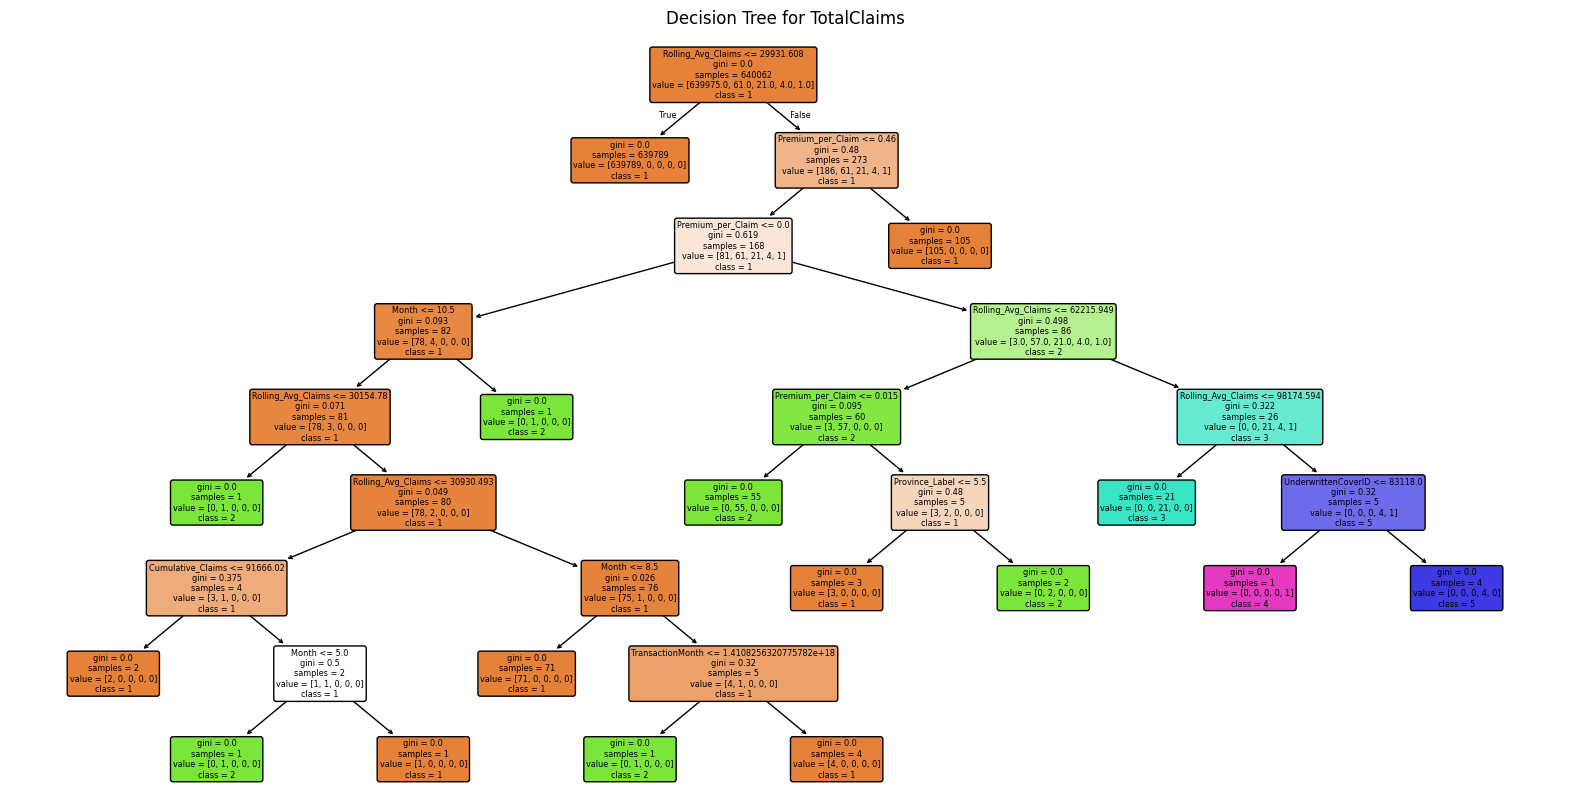

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
# Assuming X is your feature matrix and y_train_totalclaims is your target
plt.figure(figsize=(20, 10))  # Set the size of the plot

# Extract the class labels from y_train_totalclaims
class_names = [str(label) for label in y_train_totalclaims.unique()]

# Plot the decision tree with the correct class names
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=class_names, rounded=True)

plt.title("Decision Tree for TotalClaims")
plt.show()

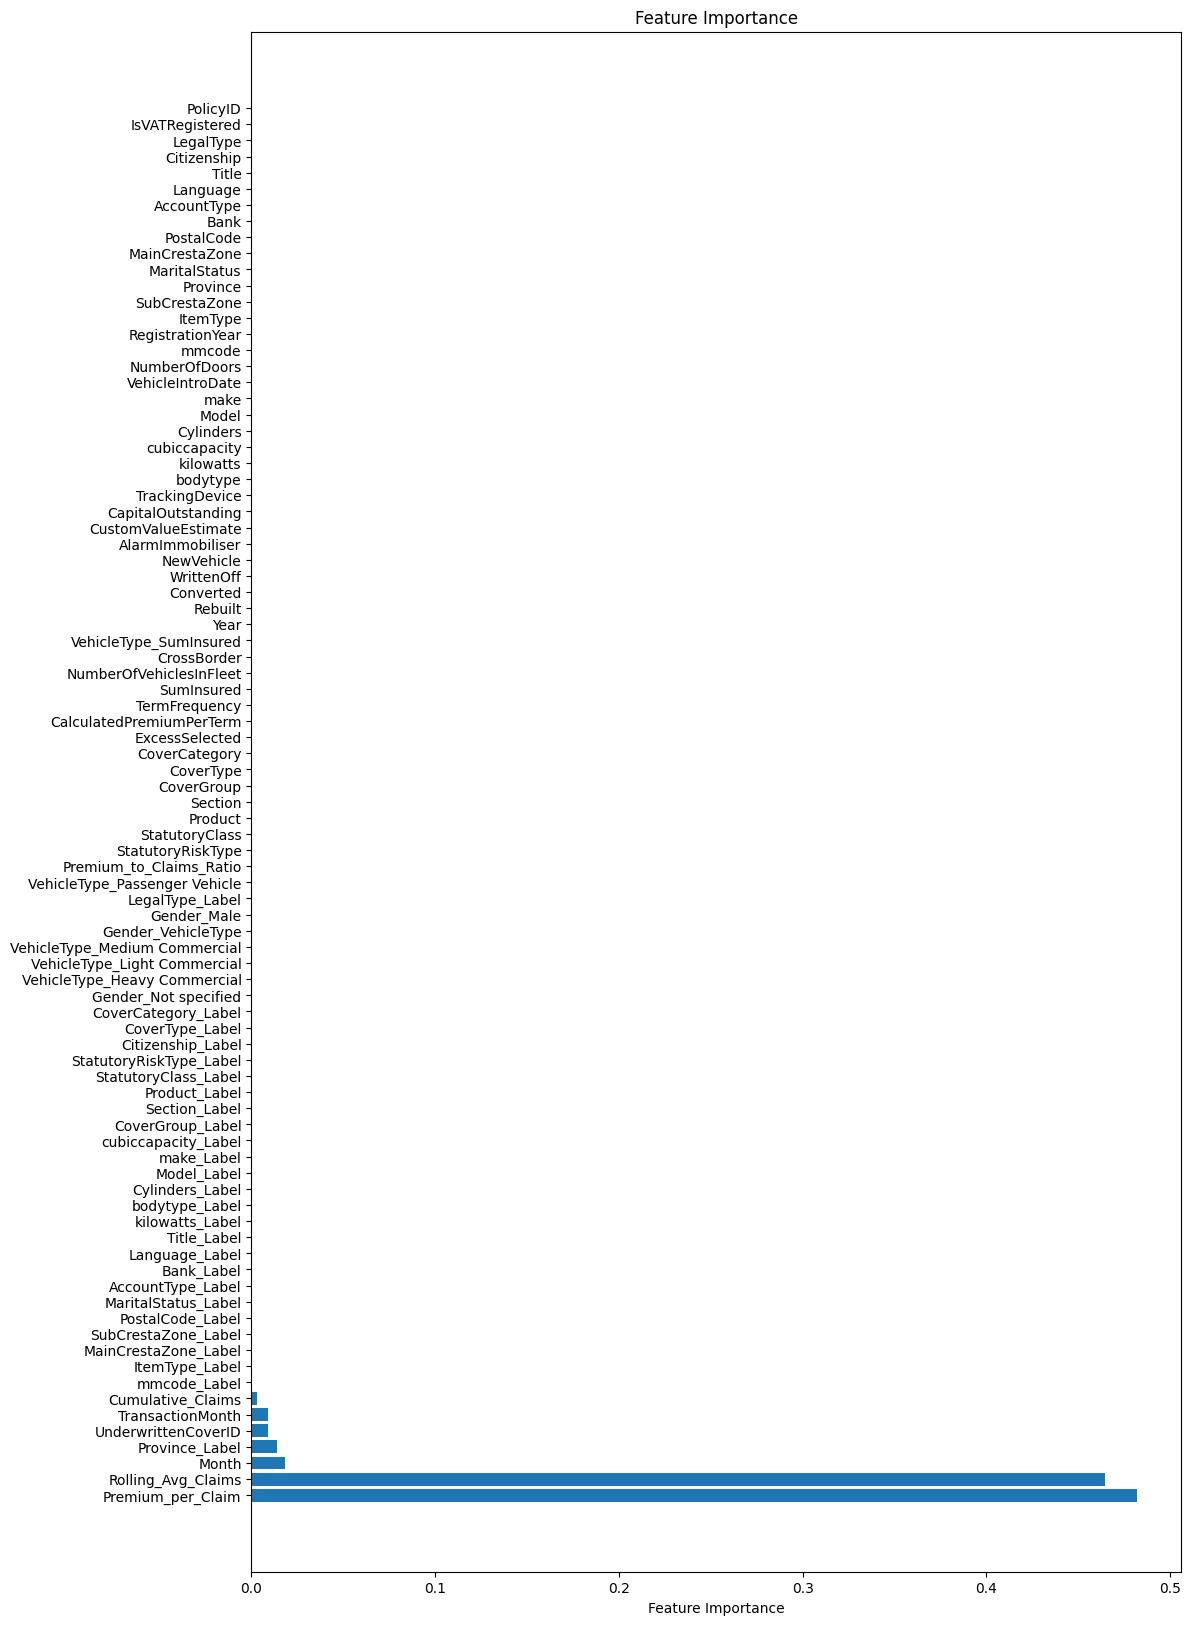

In [53]:

# Get feature importance from the Decision Tree model
importances = dt_model.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort the feature importances in descending order

# Plotting feature importance
plt.figure(figsize=(12, 20))
plt.title("Feature Importance")
plt.barh(range(len(importances)), importances[indices], align="center")
plt.yticks(range(len(importances)), [X.columns[i] for i in indices])
plt.xlabel("Feature Importance")
plt.show()
